In [12]:
#setup
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import matplotlib.patches as patches
from matplotlib.lines import Line2D
import matplotlib as mpl
import itertools as it
mpl.rcParams['pdf.fonttype'] = 42


def get_colormap(colors, N = 256):
    return clr.LinearSegmentedColormap.from_list('custom', colors, N=N) if len(colors) > 1 else plt.get_cmap(*colors)


def get_bin_index(site, leftBound, rightBound, binsize):
    binbounds = np.arange(leftBound, rightBound, binsize)
    # -1 because 0-based indices
    return len(np.where(binbounds < site)[0]) - 1 \
           if not (site < binbounds[0] or site > binbounds[-1]) \
           else None


def annotate_contacts(ax, 
                      contacts, 
                      r = 2.5, 
                      linestyle = '--', 
                      edgecolor = 'k',
                      mirror_horizontal = False):
    t = np.array([[1, 0.5], [-1, 0.5]]) if mirror_horizontal else np.array([[-1, 0.5], [1, 0.5]])
    
    for x, y in contacts:
        M = np.array([[x, y]])
        M = np.dot(M, t)
        ax.add_patch(patches.Circle((M[:, 1], M[:, 0]), 
                                    radius = r,
                                    fill = False,
                                    ls = linestyle,
                                    edgecolor = edgecolor,
                                    zorder = 3))

igh = (114435000, 114669000)
interacting_regions = {'3CBE3RR': (114453981, 114492784),
                        '3CBEhs4': (114453981, 114466981),
                        '3CBE': (114453981, 114463472),
                        '3RR': (114466175, 114492784),
                        '3RR+': (114463472, 114492784),
                        'hs4': (114466175, 114466981),
                        'hs3b+4': (114466175, 114471105),
                        'hs3a': (114491704, 114492784),
                        'hs1,2': (114482373, 114483741),
                        'Em': (114664789, 114666183),
                        'Sm': (114662156, 114666183),
                        'mu': (114657164, 114666183),
                        'mu+': (114655000, 114666183),
                        'muDelta': (114652483, 114666183),
                        'SmCm': (114657164, 114664070),
                        'IgG1': (114577464, 114577709),
                        'IgG1+-2kb': (114577464-2000, 114577709+2000),
                        'CG1_3SG1': (114564902, 114572600),
                        'G1': (114564902, 114577582),
                        'G1+5kb': (114564902, 114577582+5000)}

In [13]:
# reading in samplenames and subset for IgG1 samples of mouse
samplenames = pd.read_csv('resource/sampleinfo_TriC12.tsv', 
                          sep = '\t', 
                          header = None, 
                          names = ['name', 'capture', 'genome'])
n = 'AIDKO'
samplenames = samplenames.loc[samplenames.capture.str.startswith('IgG1_pool_capture') & 
                              (samplenames.genome == 'mm9') &
                              samplenames.name.str.startswith('TriC12_lane_1_B18AIDKO2')] \
                         .reset_index(drop = True)

samplenames


,name,capture,genome
0,TriC12_lane_1_B18AIDKO2_d0_1+3,IgG1_pool_capture,mm9
1,TriC12_lane_1_B18AIDKO2_d0_2,IgG1_pool_capture,mm9
2,TriC12_lane_1_B18AIDKO2_d2_1,IgG1_pool_capture,mm9
3,TriC12_lane_1_B18AIDKO2_d2_2,IgG1_pool_capture,mm9
4,TriC12_lane_1_B18AIDKO2_d2_3,IgG1_pool_capture,mm9
5,TriC12_lane_1_B18AIDKO2_d3_1,IgG1_pool_capture,mm9
6,TriC12_lane_1_B18AIDKO2_d3_2,IgG1_pool_capture,mm9
7,TriC12_lane_1_B18AIDKO2_d3_3,IgG1_pool_capture,mm9


In [14]:
# reading in samplenames and subset for IgG1 samples of mouse
samplenames2 = pd.read_csv('resource/sampleinfo_TriC12.tsv', 
                          sep = '\t', 
                          header = None, 
                          names = ['name', 'capture', 'genome'])
n = 'AIDKO'
samplenames2 = samplenames2.loc[samplenames2.capture.str.startswith('IgG1_pool_capture') & 
                              (samplenames2.genome == 'mm9') &
                              samplenames2.name.str.startswith('TriC12_lane_1_B18AIDKO3')] \
                         .reset_index(drop = True)
samplenames2


,name,capture,genome
0,TriC12_lane_1_B18AIDKO3_d0_1+3,IgG1_pool_capture,mm9
1,TriC12_lane_1_B18AIDKO3_d0_2,IgG1_pool_capture,mm9
2,TriC12_lane_1_B18AIDKO3_d2_1,IgG1_pool_capture,mm9
3,TriC12_lane_1_B18AIDKO3_d2_2,IgG1_pool_capture,mm9
4,TriC12_lane_1_B18AIDKO3_d2_3,IgG1_pool_capture,mm9
5,TriC12_lane_1_B18AIDKO3_d3_1,IgG1_pool_capture,mm9
6,TriC12_lane_1_B18AIDKO3_d3_2,IgG1_pool_capture,mm9
7,TriC12_lane_1_B18AIDKO3_d3_3,IgG1_pool_capture,mm9


In [15]:
samplenames = pd.concat([samplenames, samplenames2])
samplenames

,name,capture,genome
0,TriC12_lane_1_B18AIDKO2_d0_1+3,IgG1_pool_capture,mm9
1,TriC12_lane_1_B18AIDKO2_d0_2,IgG1_pool_capture,mm9
2,TriC12_lane_1_B18AIDKO2_d2_1,IgG1_pool_capture,mm9
3,TriC12_lane_1_B18AIDKO2_d2_2,IgG1_pool_capture,mm9
4,TriC12_lane_1_B18AIDKO2_d2_3,IgG1_pool_capture,mm9
5,TriC12_lane_1_B18AIDKO2_d3_1,IgG1_pool_capture,mm9
6,TriC12_lane_1_B18AIDKO2_d3_2,IgG1_pool_capture,mm9
7,TriC12_lane_1_B18AIDKO2_d3_3,IgG1_pool_capture,mm9
0,TriC12_lane_1_B18AIDKO3_d0_1+3,IgG1_pool_capture,mm9
1,TriC12_lane_1_B18AIDKO3_d0_2,IgG1_pool_capture,mm9


In [16]:
# reading matrices and setting capture bins to 0
mats = {}
cbinidx = get_bin_index(interacting_regions['IgG1'][0], igh[0], igh[1], 1000)
for name in samplenames.name:
    m = np.loadtxt(f'TriCplots/{name}_TriC_interactions_1000_RAW.tab',
                   delimiter = '\t')
    m[cbinidx, :] = 0
    m[:, cbinidx] = 0
    mats[name] = m


In [17]:
def sum_contacts(m, contact_regions, total_region, binsize = 1000, r = 0):
    idxs = []
    contact_sum = 0
    for contact_region in it.combinations(contact_regions, 2):
        region_idxs = []
        for start, end in contact_region:
            width = end - start
            
            if r and width < binsize * (2 * r + 1):
                mid = start + (end - start)//2
                midbin = get_bin_index(mid, total_region[0], total_region[1], binsize)
                startbin = midbin - r
                endbin = midbin + r + 1
                
            else:
                startbin = get_bin_index(start, total_region[0], total_region[1], binsize)
                endbin = get_bin_index(end, total_region[0], total_region[1], binsize) + 1

            region_idxs.append((startbin, endbin))
            
        contact_sum += m[region_idxs[0][0]: region_idxs[0][1], region_idxs[1][0]: region_idxs[1][1]].sum()
        idxs.append(region_idxs)
    
    return contact_sum, idxs

In [18]:
regions1 = ['hs3a', 'hs1,2', 'hs3b+4', '3RR', '3RR+', '3CBE', '3CBEhs4', '3CBE3RR']
regions2 = ['mu+']

contactsums = []
for sample, capture in zip(samplenames.name, samplenames.capture):
    if sample[-2] == '+': # Exeption for TriC12-13 because replicates 1 and 3 are already pooled for d0 samples (look at names)
        n = 1
        name = sample[:-4]
    else: 
        n = int(sample[-1:])
        name = sample[:-2]
    m = mats[sample]
    for region1, region2 in it.product(regions1, regions2):
        contact_sum, idxs = sum_contacts(m, 
                                         [interacting_regions[region1], 
                                          interacting_regions[region2]], 
                                         igh,
                                         binsize=1000,
                                         r = 2)
        
        idxs = idxs[0]
        region1_bincount = idxs[0][1] - idxs[0][0]
        region2_bincount = idxs[1][1] - idxs[1][0]
        squarebins = region1_bincount * region2_bincount

        pcontacts = contact_sum/squarebins #normalize by number of bins in reg. of interest (=squarebins)
        contactsums.append([name, n, capture, region1, region2, pcontacts])
        
contactsums = pd.DataFrame(contactsums, columns = ['sample', 'replicate', 'capture', 'region1', 'region2', 'pinteractions'])
contactsums = contactsums[contactsums['region1'] != contactsums['region2']]
contactsums = contactsums.sort_values(['sample', 'replicate'])
contactsums

,sample,replicate,capture,region1,region2,pinteractions
0,TriC12_lane_1_B18AIDKO2_d0,1,IgG1_pool_capture,hs3a,mu+,3.457385
1,TriC12_lane_1_B18AIDKO2_d0,1,IgG1_pool_capture,"hs1,2",mu+,1.557231
2,TriC12_lane_1_B18AIDKO2_d0,1,IgG1_pool_capture,hs3b+4,mu+,0.000000
3,TriC12_lane_1_B18AIDKO2_d0,1,IgG1_pool_capture,3RR,mu+,1.190826
4,TriC12_lane_1_B18AIDKO2_d0,1,IgG1_pool_capture,3RR+,mu+,1.781026
...,...,...,...,...,...,...
123,TriC12_lane_1_B18AIDKO3_d3,3,IgG1_pool_capture,3RR,mu+,3.849601
124,TriC12_lane_1_B18AIDKO3_d3,3,IgG1_pool_capture,3RR+,mu+,5.065538
125,TriC12_lane_1_B18AIDKO3_d3,3,IgG1_pool_capture,3CBE,mu+,9.565944
126,TriC12_lane_1_B18AIDKO3_d3,3,IgG1_pool_capture,3CBEhs4,mu+,11.145275


In [19]:
# tmp = contactsums.groupby('capture')
# for (capture, group) in tmp:
# 	regiongroups = group.groupby(['region1', 'region2'])
# 	# for i in zip(group['region1'], group['region2']): print(i)
# 	# for i in regiongroups: print(i)

# sns.load_dataset('penguins')

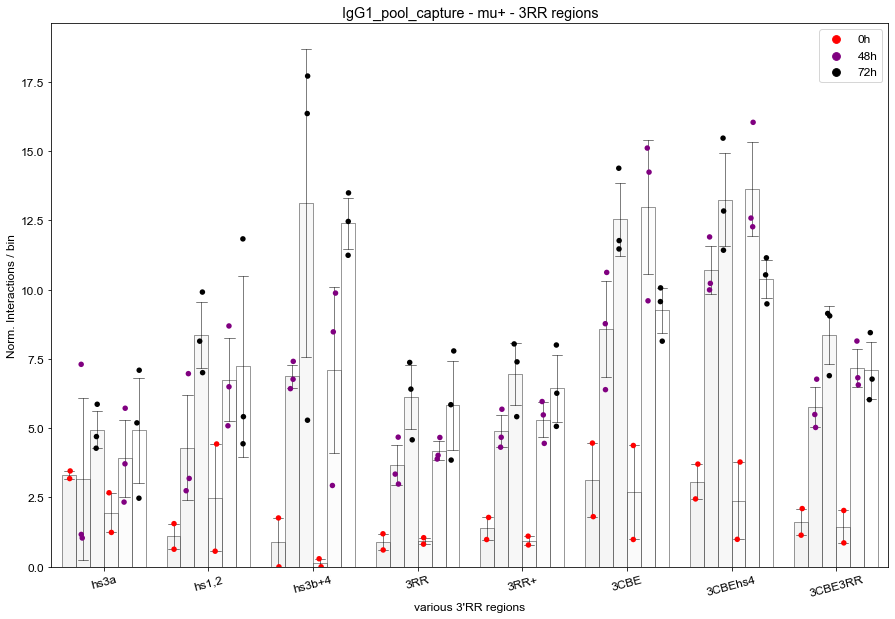

In [21]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 0.5

fig = plt.figure(figsize=(15,10))

axCounter = 1
for (capture, group) in contactsums.groupby('capture'): # for each subplot / capture
	ax = fig.add_subplot(len(set(contactsums.capture)), 1, axCounter)
	axCounter = axCounter + 1
	sns.barplot(data=group, x='region1', y='pinteractions', hue='sample', ci='sd', color='white', linewidth=0.5, edgecolor='black', 
		errcolor='black', errwidth=0.5, capsize=0.1, alpha=0.8, ax=ax)
	sns.stripplot(data=group, x='region1', y='pinteractions', hue='sample', ax=ax, dodge=True, size=5.5,
		palette=['red', 'purple', 'black'])
	handles, labels = ax.get_legend_handles_labels()
	ax.legend_.remove()
	ax.legend(handles, ['0h', '48h', '72h'])
	ax.set_ylabel('Norm. Interactions / bin')
	ax.set_xlabel("various 3'RR regions")
	ax.set_xticklabels(ax.get_xticklabels(), rotation=15)
	ax.set_title(f'{capture} - {group["region2"][0]} - 3RR regions')

fig.savefig('plots/TriC12/TriC12_mm9AIDKOmerge_RegOfInterest_IgG1pool-Mu+-v3RRregions.pdf')
